For Visualizaiton

=== Section 1: Random Images from 'All' ===


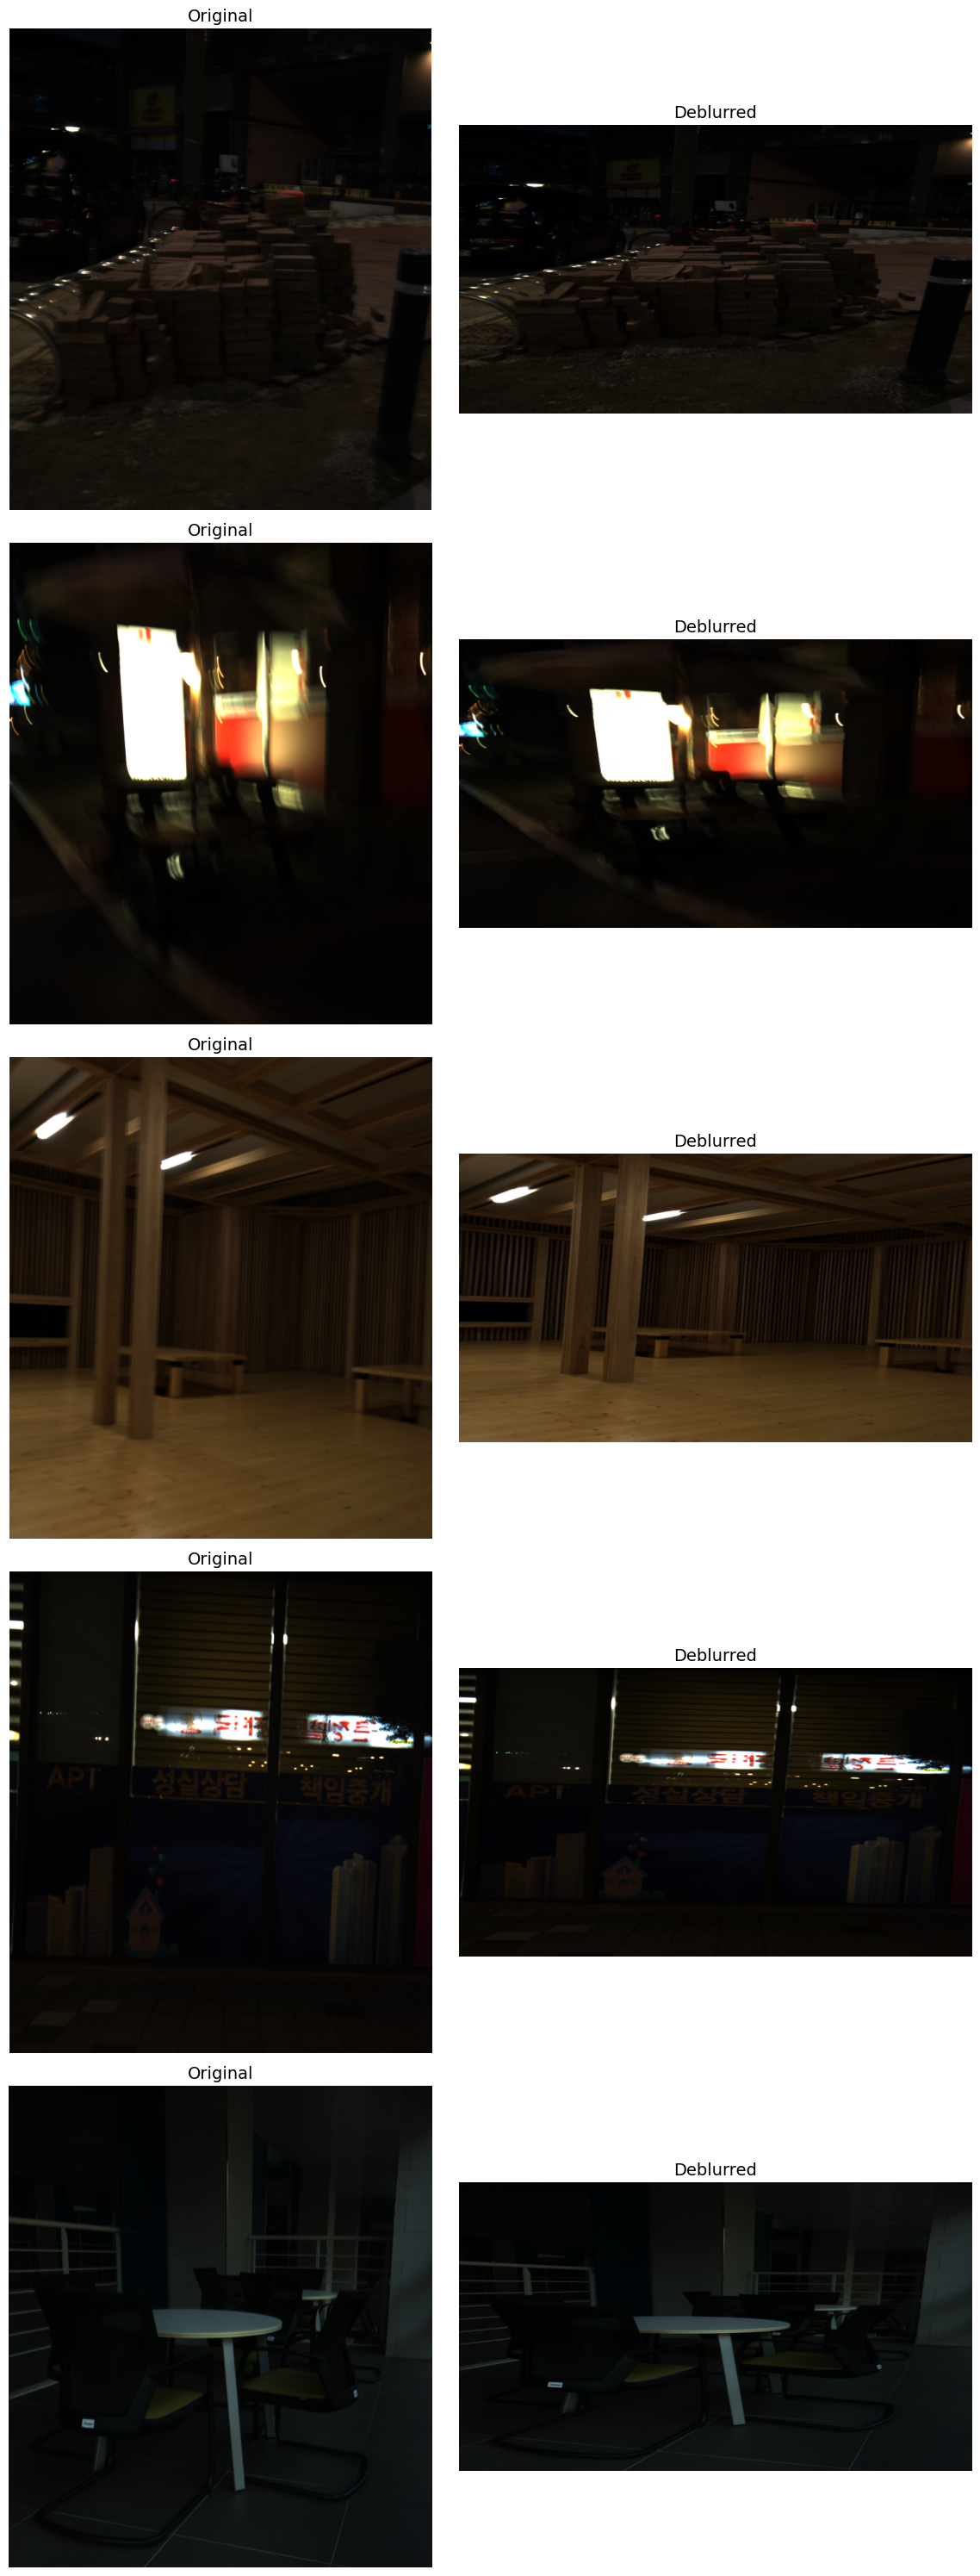

Selected images from 'All': ['blur_115_PSNR33.86_SSIM0.95_MAE0.01_LPIPS0.03_DeltaE0.92.png', 'blur_708_PSNR19.09_SSIM0.82_MAE0.04_LPIPS0.20_DeltaE2.32.png', 'blur_214_PSNR32.83_SSIM0.93_MAE0.01_LPIPS0.05_DeltaE2.03.png', 'blur_541_PSNR35.89_SSIM0.98_MAE0.01_LPIPS0.02_DeltaE0.83.png', 'blur_783_PSNR42.12_SSIM0.98_MAE0.00_LPIPS0.01_DeltaE0.58.png']
=== Section 2: Random Good Examples ===


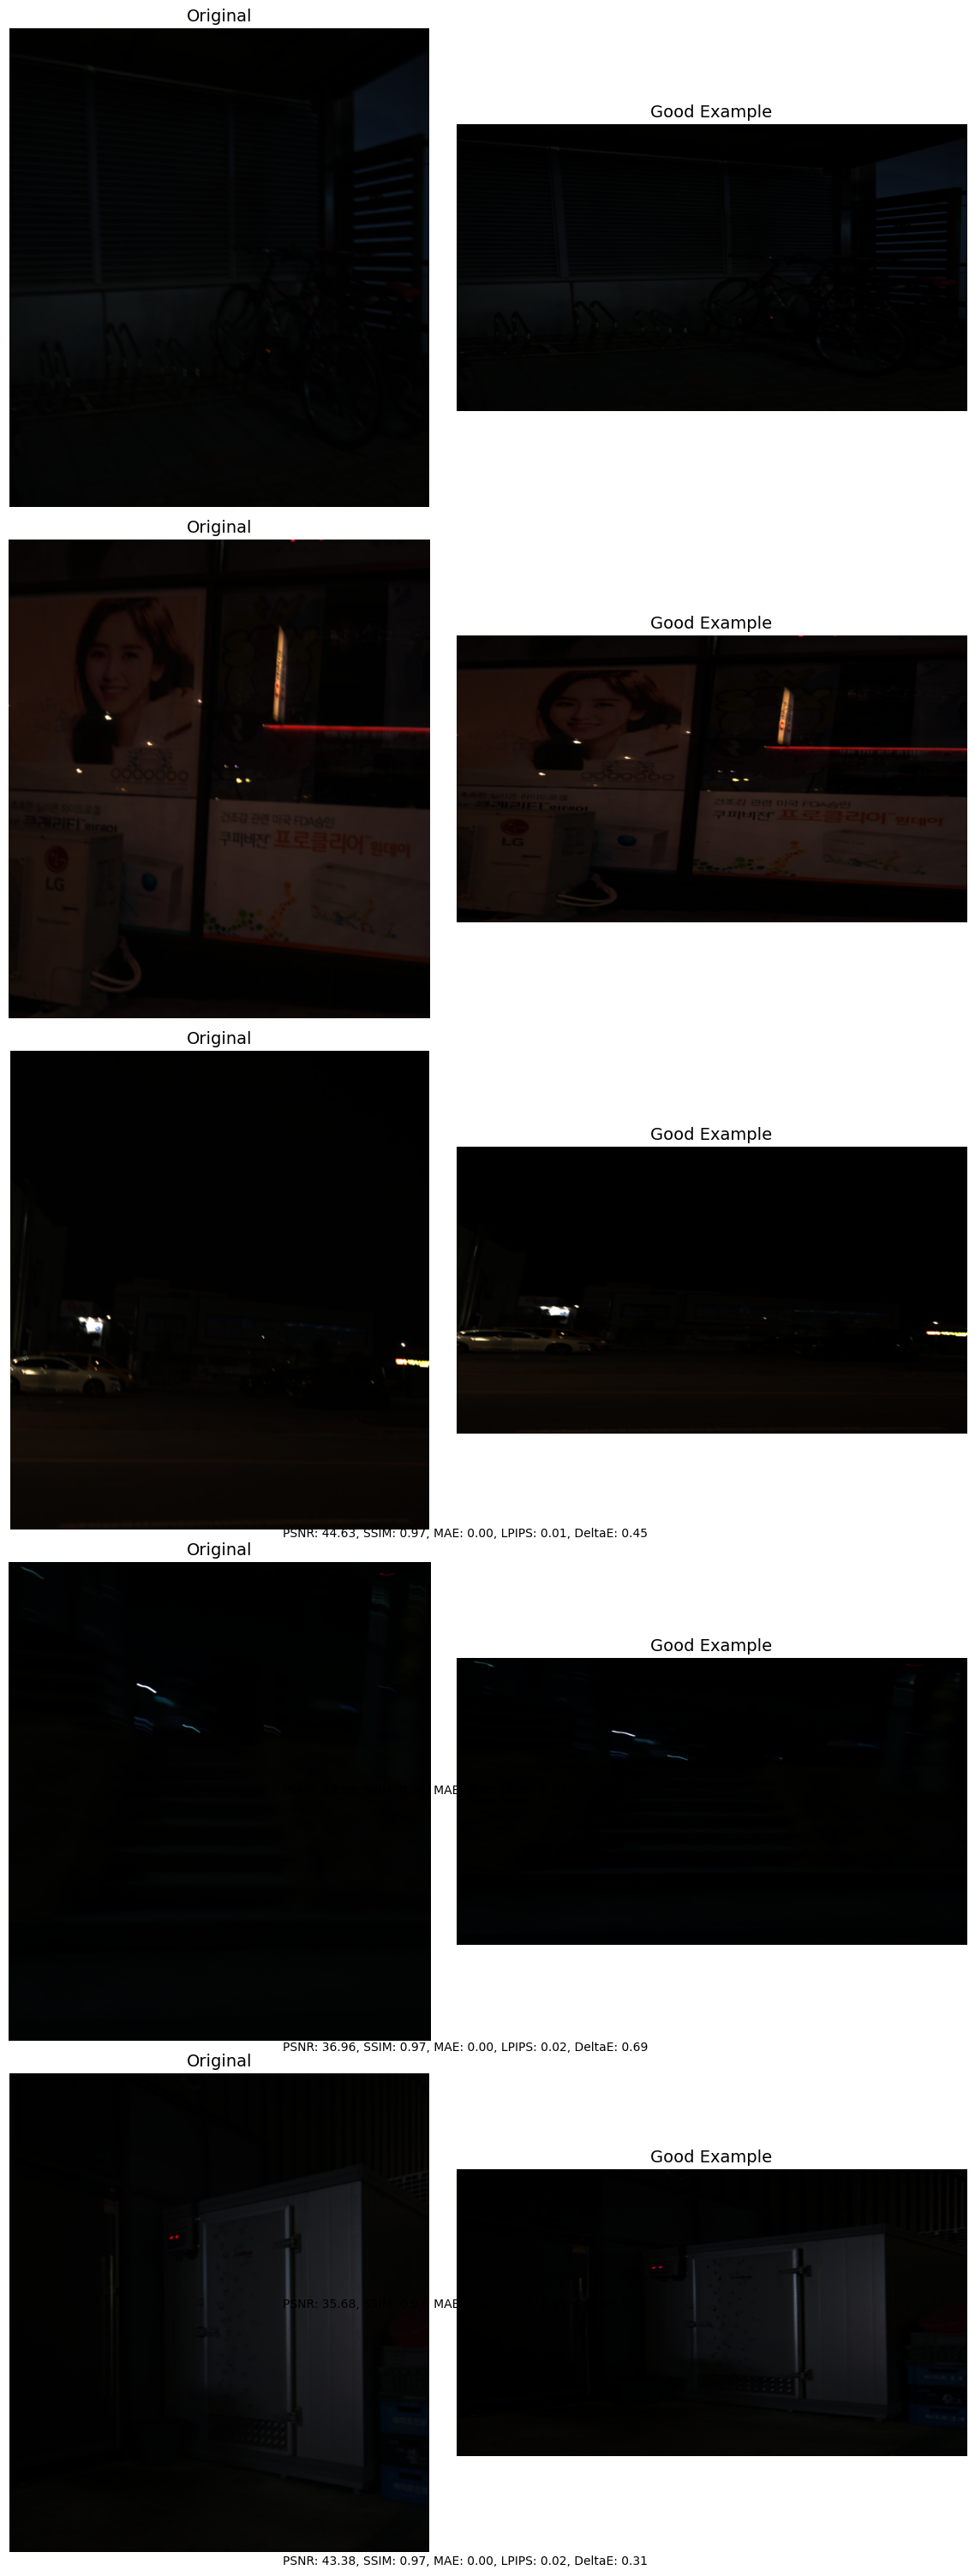

Selected images from 'Good': ['blur_375_PSNR44.63_SSIM0.97_MAE0.00_LPIPS0.01_DeltaE0.45.png', 'blur_260_PSNR38.50_SSIM0.98_MAE0.00_LPIPS0.02_DeltaE0.90.png', 'blur_390_PSNR36.96_SSIM0.97_MAE0.00_LPIPS0.02_DeltaE0.69.png', 'blur_11_PSNR35.68_SSIM0.97_MAE0.00_LPIPS0.05_DeltaE0.27.png', 'blur_914_PSNR43.38_SSIM0.97_MAE0.00_LPIPS0.02_DeltaE0.31.png']
=== Section 3: Random Bad Examples ===


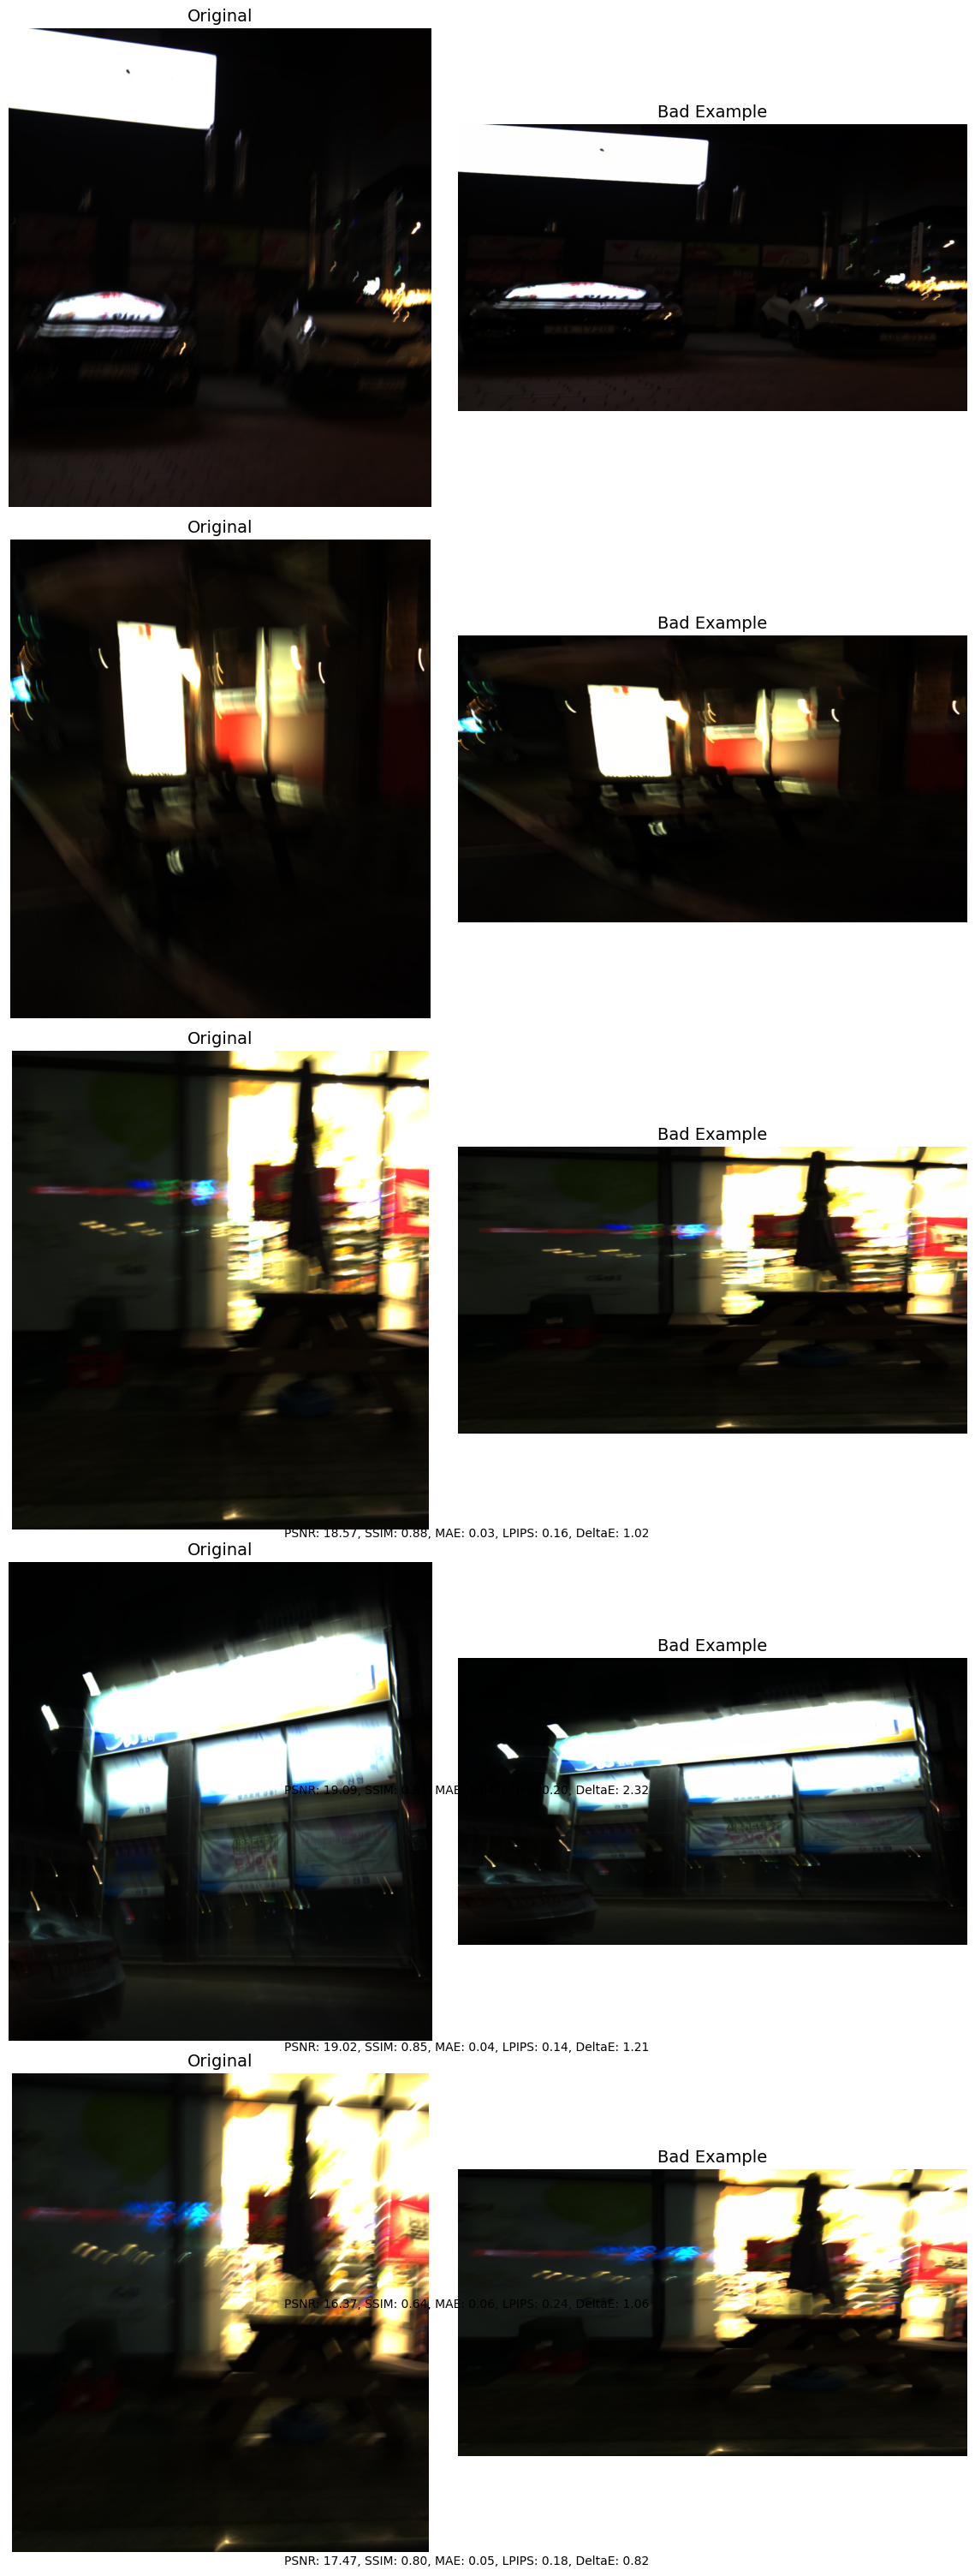

Selected images from 'Bad': ['blur_37_PSNR18.57_SSIM0.88_MAE0.03_LPIPS0.16_DeltaE1.02.png', 'blur_708_PSNR19.09_SSIM0.82_MAE0.04_LPIPS0.20_DeltaE2.32.png', 'blur_552_PSNR19.02_SSIM0.85_MAE0.04_LPIPS0.14_DeltaE1.21.png', 'blur_829_PSNR16.37_SSIM0.64_MAE0.06_LPIPS0.24_DeltaE1.06.png', 'blur_564_PSNR17.47_SSIM0.80_MAE0.05_LPIPS0.18_DeltaE0.82.png']


In [6]:
# Import required libraries
import os
import random
import re
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from natsort import natsorted

# Directories
original_dir = 'dataset/motion/testrealblur/RealBlur-R/input'  # Original images directory
all_dir = 'results/motion/testrealblur/RealBlur-R/motion_deblurring_RealBlur-R/all'
good_dir = 'results/motion/testrealblur/RealBlur-R/motion_deblurring_RealBlur-R/good'
bad_dir = 'results/motion/testrealblur/RealBlur-R/motion_deblurring_RealBlur-R/bad'

# Function to extract metrics from filenames
def extract_metrics(filename):
    """
    Extract metrics like PSNR, SSIM, MAE, LPIPS, and DeltaE from the filename.
    """
    pattern = r'_PSNR([\d.]+)_SSIM([\d.]+)_MAE([\d.]+)_LPIPS([\d.]+)_DeltaE([\d.]+)\.png'
    match = re.search(pattern, filename)
    if match:
        return {
            "PSNR": float(match.group(1)),
            "SSIM": float(match.group(2)),
            "MAE": float(match.group(3)),
            "LPIPS": float(match.group(4)),
            "DeltaE": float(match.group(5)),
        }
    return {}

# Load images
original_images = natsorted(glob(os.path.join(original_dir, '*.png')) + glob(os.path.join(original_dir, '*.jpg')))
all_images = natsorted(glob(os.path.join(all_dir, '*.png')))
good_images = natsorted(glob(os.path.join(good_dir, '*.png')))
bad_images = natsorted(glob(os.path.join(bad_dir, '*.png')))

# Fetch random images
def fetch_random_images(image_list, count=5):
    """
    Fetch a specified number of random images from the given list.
    """
    if len(image_list) < count:
        print(f"Not enough images in the list. Available: {len(image_list)}")
        count = len(image_list)
    return random.sample(image_list, count)

# Visualize images
def visualize_images(image_list, title_prefix, original_dir, num_images=5, include_metrics=True):
    """
    Visualize images with their original counterparts and optionally add metrics below the row.
    """
    images = fetch_random_images(image_list, num_images)
    selected_filenames = []

    # Display images
    fig, axes = plt.subplots(len(images), 2, figsize=(12, 6 * len(images)))
    for i, image_path in enumerate(images):
        # Extract filename and metrics
        filename = os.path.basename(image_path)
        selected_filenames.append(filename)
        metrics = extract_metrics(filename)
        base_name = os.path.splitext(filename)[0].split("_PSNR")[0]

        # Load images
        result_img = Image.open(image_path)
        original_path = os.path.join(original_dir, f"{base_name}.png")  # Match original by base name
        original_img = Image.open(original_path) if os.path.exists(original_path) else None

        # Plot original image
        if original_img:
            axes[i, 0].imshow(original_img)
            axes[i, 0].axis('off')
            axes[i, 0].set_title("Original", fontsize=14, loc='center')
        else:
            axes[i, 0].text(0.5, 0.5, "Original Not Found", ha='center', va='center', fontsize=12)
            axes[i, 0].axis('off')

        # Plot result image
        axes[i, 1].imshow(result_img)
        axes[i, 1].axis('off')
        axes[i, 1].set_title(title_prefix, fontsize=14, loc='center')

        # Add metrics below the entire row if required
        if include_metrics:
            fig.text(0.5, 0.5 - (0.1 * (i + 1)), f"PSNR: {metrics.get('PSNR', 'N/A'):.2f}, "
                                                 f"SSIM: {metrics.get('SSIM', 'N/A'):.2f}, "
                                                 f"MAE: {metrics.get('MAE', 'N/A'):.2f}, "
                                                 f"LPIPS: {metrics.get('LPIPS', 'N/A'):.2f}, "
                                                 f"DeltaE: {metrics.get('DeltaE', 'N/A'):.2f}",
                     ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Return selected filenames for reference
    return selected_filenames

# Section 1: Display Random Images from "All"
print("=== Section 1: Random Images from 'All' ===")
selected_all = visualize_images(all_images, title_prefix="Deblurred", original_dir=original_dir, num_images=5, include_metrics=False)
print("Selected images from 'All':", selected_all)

# Section 2: Display Random Good Examples
print("=== Section 2: Random Good Examples ===")
selected_good = visualize_images(good_images, title_prefix="Good Example", original_dir=original_dir, num_images=5, include_metrics=True)
print("Selected images from 'Good':", selected_good)

# Section 3: Display Random Bad Examples
print("=== Section 3: Random Bad Examples ===")
selected_bad = visualize_images(bad_images, title_prefix="Bad Example", original_dir=original_dir, num_images=5, include_metrics=True)
print("Selected images from 'Bad':", selected_bad)


In [7]:
import os
from PIL import Image

# Directories
original_dir = 'dataset/motion/testrealblur/RealBlur-R/input'  # Original images directory
all_dir = 'results/motion/testrealblur/RealBlur-R/motion_deblurring_RealBlur-R/all'

# Get all image paths
original_images = os.listdir(original_dir)
deblurred_images = os.listdir(all_dir)

# Check dimensions
for original_image in original_images:
    original_path = os.path.join(original_dir, original_image)
    deblurred_path = os.path.join(all_dir, original_image)  # Match by filename

    if not os.path.exists(deblurred_path):
        print(f"Deblurred image not found for: {original_image}")
        continue

    original = Image.open(original_path)
    deblurred = Image.open(deblurred_path)

    if original.size != deblurred.size:
        print(f"Dimension mismatch: {original_image}")
        print(f"Original: {original.size}, Deblurred: {deblurred.size}")
    else:
        print(f"Match: {original_image} - {original.size}")


Deblurred image not found for: blur_592.png
Deblurred image not found for: blur_301.png
Deblurred image not found for: blur_921.png
Deblurred image not found for: blur_30.png
Deblurred image not found for: blur_828.png
Deblurred image not found for: blur_46.png
Deblurred image not found for: blur_87.png
Deblurred image not found for: blur_577.png
Deblurred image not found for: blur_127.png
Deblurred image not found for: blur_44.png
Deblurred image not found for: blur_136.png
Deblurred image not found for: blur_744.png
Deblurred image not found for: blur_975.png
Deblurred image not found for: blur_280.png
Deblurred image not found for: blur_293.png
Deblurred image not found for: blur_513.png
Deblurred image not found for: blur_331.png
Deblurred image not found for: blur_323.png
Deblurred image not found for: blur_94.png
Deblurred image not found for: blur_14.png
Deblurred image not found for: blur_427.png
Deblurred image not found for: blur_831.png
Deblurred image not found for: blur_37